In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("kc_housingdata.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [6]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [7]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [8]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (21613, 4)


In [9]:
## Create a cluster model
import sklearn.cluster as cluster

In [11]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [12]:
kmeans.labels_ #0,1,2

array([2, 0, 2, ..., 2, 0, 2])

In [13]:
kmeans.cluster_centers_

array([[-0.03526871,  0.35465742,  0.36895087,  0.22515342],
       [ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.46468042, -0.72681522, -0.86617881, -0.79253015]])

In [14]:
kmeans.inertia_

39577.935047404746

In [10]:
## Elbow method
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [11]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,86452.000000
1,2,52446.716028
2,3,39577.935047
3,4,33318.297922
4,5,28928.263752
5,6,26256.199352
6,7,24145.795758
7,8,22135.022454
8,9,20838.642269
9,10,19607.703050


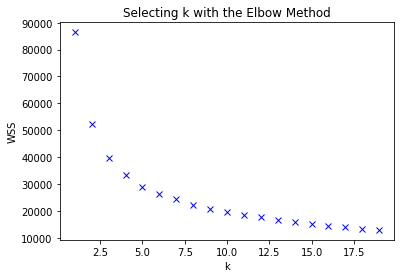

In [11]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [12]:
#choosing 8
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

In [13]:
data['Clusters'] = labels

In [14]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Clusters
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6


In [15]:
data.to_csv('Clusters8.csv', index = False)

In [22]:
data.groupby('Clusters').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Clusters,,,,,,,,,,,,,,,,,,,,
0,4.622314e+09,7.767717e+05,3.691252,2.681434,2991.906769,22945.557152,1.785760,0.008940,0.440932,3.342912,8.790868,2612.243295,379.663474,1982.920498,139.166986,98067.733397,47.591583,-122.161061,2645.318646,18613.965198
1,4.491311e+09,3.412270e+05,3.109893,1.303389,1355.854224,11870.925991,1.141042,0.001246,0.063793,3.514328,6.832544,1240.300274,115.553950,1956.121605,56.658610,98084.209071,47.534763,-122.239456,1522.580115,10860.840269
2,4.093870e+09,1.379167e+06,4.228370,3.445171,4095.508048,33078.347082,1.882294,0.043260,1.028169,3.363179,9.976861,3403.395372,692.112676,1984.798793,180.968813,98062.125755,47.607971,-122.182708,3210.646881,23674.959759
3,4.214428e+09,2.893575e+06,4.534161,4.155280,5476.248447,28451.962733,1.928571,0.229814,1.981366,3.459627,10.944099,4349.937888,1126.310559,1976.080745,248.472050,98058.409938,47.618808,-122.225720,3573.807453,20423.298137
4,4.507984e+09,3.585363e+05,1.909202,1.181800,1093.815133,11378.217178,1.197751,0.006953,0.134560,3.386094,6.596728,996.007362,97.807771,1948.286708,86.107157,98108.755419,47.582667,-122.282749,1447.115337,9444.143967
5,4.626364e+09,6.422744e+05,5.354206,2.909346,3017.319626,15486.084112,1.602336,0.002804,0.307477,3.432710,8.082243,2362.075701,655.243925,1975.724299,112.066355,98071.327103,47.575347,-122.198279,2358.085047,12599.292523
6,4.656825e+09,4.653724e+05,2.911692,2.264396,1861.086376,13270.303020,1.625439,0.004565,0.165906,3.344628,7.605513,1613.984902,247.101475,1980.536868,67.297051,98075.163624,47.559408,-122.207563,1865.997893,11933.075140
7,4.692346e+09,4.435295e+05,4.119454,2.214408,2117.237689,12083.188445,1.472818,0.000975,0.117747,3.464651,7.498537,1768.499512,348.738176,1972.000975,55.409556,98071.410288,47.530227,-122.208154,1970.567772,10413.727206


In [21]:
import cluster_profiles as cluster_profiles

In [23]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.644691,0.344504,0.735787,0.992995,3132
1,-0.541668,-0.280571,-1.053502,-0.788342,4013
2,2.285528,0.922012,1.727444,2.194598,994
3,6.410548,1.250798,2.649467,3.697950,161
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.203515,-0.493676,0.194295,-0.238244,5696
7,-0.263011,0.804906,0.129389,0.040654,4102


In [24]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,1.438231,1.095053,1.267963,1.438486,3132
1,0.631799,0.922586,0.616330,0.651884,4013
2,2.553597,1.254396,1.629109,1.969089,994
3,5.357597,1.345113,1.964897,2.632939,161
4,0.663848,0.566387,0.558835,0.525898,2445
5,1.189203,1.588388,1.375735,1.450704,1070
6,0.861660,0.863788,1.070759,0.894796,5696
7,0.821217,1.222085,1.047121,1.017952,4102


In [27]:
kmeans.labels_

array([ 7, 10,  8, ...,  8,  2,  8])

In [33]:
data['Clusters'] = kmeans.labels_

In [29]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Clusters
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,10
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,8
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,15
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


In [42]:
data.groupby(['Clusters']).mean()[['price','bedrooms','sqft_living']]

,price,bedrooms,sqft_living
Clusters,,,
0,7.767717e+05,3.691252,2991.906769
1,3.412270e+05,3.109893,1355.854224
2,1.379167e+06,4.228370,4095.508048
3,2.893575e+06,4.534161,5476.248447
4,3.585363e+05,1.909202,1093.815133
5,6.422744e+05,5.354206,3017.319626
6,4.653724e+05,2.911692,1861.086376
7,4.435295e+05,4.119454,2117.237689
